In [1]:
import os
os.chdir("D:\WORK\Data Science\ML- PROJECTS\Flight Fare Prediction\Flight Fare prediction")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
train_data= pd.read_csv("Data_Train.csv")

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
pd.set_option("display.max_columns", None)

In [6]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
29h 30m      1
30h 25m      1
29h 40m      1
29h 10m      1
42h 5m       1
Name: Duration, Length: 368, dtype: int64

In [8]:
train_data.shape

(10683, 11)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dropna(inplace= True)

In [11]:
train_data.shape

(10682, 11)

### Working with Date-Time data

'Date_of_Journey' column is in the object(string) format, we need to convert it into Datetime format.

* For that we use **'pd.to_datetime'** method. 

* To extract the Day and Month from the date, we use **'dt.day'** and **'dt.month'** method.


In [12]:
train_data['Day_of_Journey']= pd.to_datetime(train_data.Date_of_Journey, format= "%d/%m/%Y").dt.day

In [13]:
train_data['Month_of_Journey']= pd.to_datetime(train_data.Date_of_Journey, format= "%d/%m/%Y").dt.month

In [14]:
train_data['Day_of_Journey']

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Day_of_Journey, Length: 10682, dtype: int64

In [15]:
train_data['Day_of_Journey']

0        24
1         1
2         9
3        12
4         1
         ..
10678     9
10679    27
10680    27
10681     1
10682     9
Name: Day_of_Journey, Length: 10682, dtype: int64

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Date_of_Journey   10682 non-null  object
 2   Source            10682 non-null  object
 3   Destination       10682 non-null  object
 4   Route             10682 non-null  object
 5   Dep_Time          10682 non-null  object
 6   Arrival_Time      10682 non-null  object
 7   Duration          10682 non-null  object
 8   Total_Stops       10682 non-null  object
 9   Additional_Info   10682 non-null  object
 10  Price             10682 non-null  int64 
 11  Day_of_Journey    10682 non-null  int64 
 12  Month_of_Journey  10682 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [17]:
train_data.drop('Date_of_Journey', axis=1, inplace= True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


**Extracting Hour and Minute values from the *'Dep_Time'* and *'Arrival_Time'***

In [18]:
train_data['Dep_Hour']= pd.to_datetime(train_data['Dep_Time']).dt.hour

In [19]:
train_data['Dep_Min']= pd.to_datetime(train_data['Dep_Time']).dt.minute

In [20]:
train_data.drop('Dep_Time', axis=1, inplace= True)

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [22]:
train_data['Arrival_Hour']= pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_Min']= pd.to_datetime(train_data['Arrival_Time']).dt.minute

train_data.drop('Arrival_Time', axis=1, inplace= True)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


**Working with *'Duration'* Column**

* Duration column is in the object format too. But we can not simply use 'dt.hour' method to extract hour values, as it also has texts such as 'h' and 'm' in it.


In [24]:
duration= list(train_data['Duration']) # saving duration values in a list variable
duration 

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [25]:
list_1 = ['2h 50m', '19h']

list_1[0].split(sep= "m")[0].split(sep= " ")[-1] 

'50'

In [26]:
list_1[1].strip() + " 0m"

'19h 0m'

In [27]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2: # checks if duration contains only hour or min
        if "h" in duration[i]:
            duration[i]= duration[i].strip() + " 0m"
        else:
            duration[i]= "0h " + duration[i].strip() 
            
Duration_Hours= []
Duration_Mins= []

for i in range(len(duration)):
    Duration_Hours.append(int(duration[i].split(sep= "h")[0]))
    Duration_Mins.append(int(duration[i].split(sep= "m")[0].split(sep= " ")[-1]))
    
    

In [28]:
Duration_Hours

[2,
 7,
 19,
 5,
 4,
 2,
 15,
 21,
 25,
 7,
 13,
 2,
 2,
 12,
 2,
 26,
 4,
 22,
 23,
 20,
 5,
 15,
 2,
 2,
 13,
 15,
 5,
 5,
 2,
 2,
 2,
 13,
 2,
 22,
 5,
 10,
 5,
 2,
 6,
 11,
 11,
 8,
 22,
 2,
 12,
 2,
 2,
 2,
 16,
 19,
 3,
 25,
 2,
 3,
 2,
 16,
 15,
 2,
 6,
 25,
 12,
 27,
 10,
 10,
 2,
 10,
 2,
 1,
 13,
 2,
 1,
 26,
 7,
 13,
 5,
 2,
 2,
 1,
 19,
 2,
 14,
 2,
 22,
 9,
 10,
 21,
 5,
 18,
 12,
 18,
 9,
 11,
 17,
 13,
 2,
 2,
 2,
 3,
 1,
 16,
 12,
 12,
 7,
 24,
 2,
 8,
 7,
 14,
 30,
 19,
 15,
 2,
 12,
 10,
 5,
 15,
 16,
 10,
 2,
 11,
 2,
 1,
 14,
 20,
 2,
 23,
 18,
 16,
 2,
 2,
 8,
 16,
 3,
 2,
 14,
 23,
 21,
 21,
 2,
 10,
 8,
 8,
 5,
 8,
 11,
 27,
 8,
 20,
 4,
 8,
 2,
 24,
 2,
 12,
 12,
 23,
 16,
 2,
 25,
 26,
 28,
 2,
 25,
 9,
 4,
 15,
 1,
 2,
 9,
 2,
 22,
 3,
 11,
 9,
 12,
 17,
 5,
 25,
 20,
 13,
 18,
 1,
 9,
 16,
 2,
 4,
 5,
 24,
 2,
 2,
 4,
 25,
 6,
 3,
 18,
 2,
 12,
 19,
 2,
 8,
 9,
 2,
 3,
 2,
 12,
 2,
 9,
 2,
 9,
 29,
 2,
 5,
 9,
 10,
 4,
 1,
 11,
 2,
 2,
 10,
 2,
 10,
 1,
 9,
 

In [29]:
train_data["Duration_Hours"]= Duration_Hours
train_data["Duration_Mins"]= Duration_Mins


In [30]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [31]:
train_data.drop('Duration', axis= 1, inplace= True)

In [32]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling the categorical features

**Nominal** - where the categories are **NOT** in a particular order
             - For such a variables, we use **OneHotEncoding**
             
**Ordinal** - where the categories are in a specific order
             - For such a variables, we use **LabelEncoder**

In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Total_Stops       10682 non-null  object
 5   Additional_Info   10682 non-null  object
 6   Price             10682 non-null  int64 
 7   Day_of_Journey    10682 non-null  int64 
 8   Month_of_Journey  10682 non-null  int64 
 9   Dep_Hour          10682 non-null  int64 
 10  Dep_Min           10682 non-null  int64 
 11  Arrival_Hour      10682 non-null  int64 
 12  Arrival_Min       10682 non-null  int64 
 13  Duration_Hours    10682 non-null  int64 
 14  Duration_Mins     10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [34]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

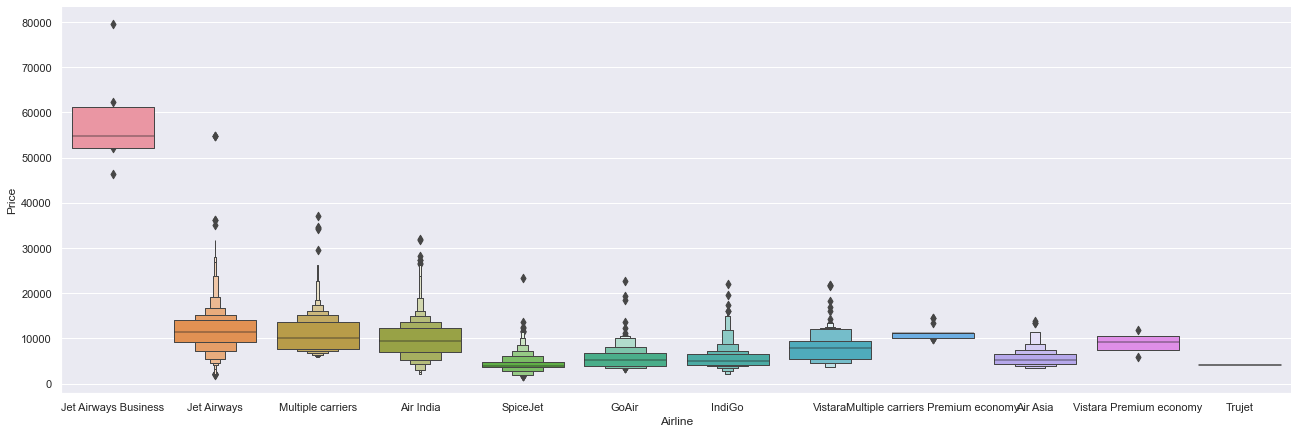

In [35]:
# Airline Vs Price

sns.catplot(y= "Price", x= "Airline", data= train_data.sort_values("Price", ascending= False),kind= "boxen", height= 6, aspect= 3)
plt.show()

In [36]:
# As Airline is a Nominal Categorical Variable we will use OneHotencoding

Airline= train_data[['Airline']]  # creating a Airline DataFrame

Airline= pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [37]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

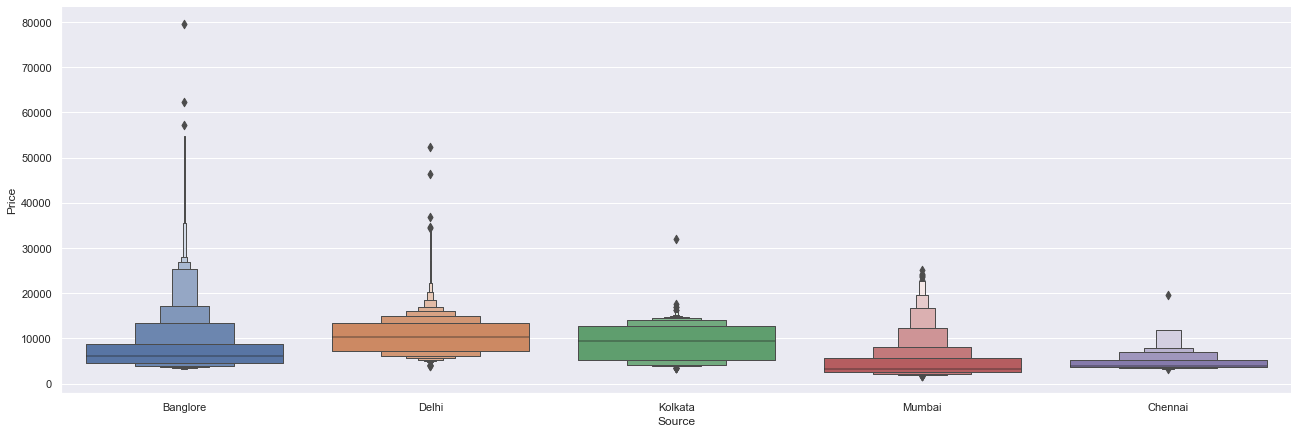

In [38]:
# Source Vs Price

sns.catplot(x= "Source", y= "Price", data= train_data.sort_values("Price", ascending= False), kind= "boxen", height= 6, aspect= 3)
plt.show()

In [39]:
#As Source is a Nominal Categorical Variable we will use OneHotencoding

Source= train_data[['Source']]

Source= pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [40]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

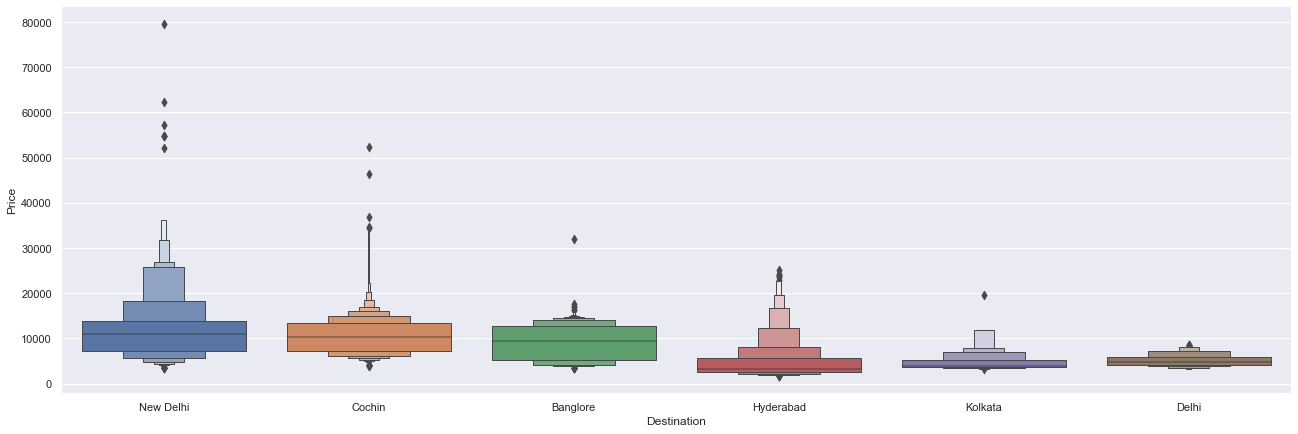

In [41]:
#Destination vs Prices

sns.catplot(x= "Destination", y= "Price", data= train_data.sort_values("Price", ascending= False), kind= "boxen", height= 6, aspect= 3)
plt.show()

In [42]:
#As Destination is a Nominal Categorical Variable we will use OneHotencoding

Destination= train_data[['Destination']]

Destination= pd.get_dummies(Destination, drop_first= True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [43]:
## Route variable

train_data['Route'].value_counts()

DEL ? BOM ? COK                2376
BLR ? DEL                      1552
CCU ? BOM ? BLR                 979
CCU ? BLR                       724
BOM ? HYD                       621
                               ... 
BOM ? COK ? MAA ? HYD             1
BOM ? JLR ? HYD                   1
BOM ? CCU ? HYD                   1
BLR ? HBX ? BOM ? BHO ? DEL       1
CCU ? IXA ? BLR                   1
Name: Route, Length: 128, dtype: int64

In [44]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [45]:
## Additional_Info has 80% of the No values in it.
## Route, is related to the Total_stops variable, 
## Hence, we can drop these 2 variables altogether

train_data.drop(['Route', 'Additional_Info'], axis=1, inplace= True)

In [46]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [47]:
## Total_Stops 

train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [48]:
## 'Total_Stops' is an Ordinal Categorical variable, we will perform LabelEncoding
# Basically KeyValue Pair method

train_data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4 }, inplace= True)

In [49]:
## Now we Concatenate the DataFrames--- >> train_data + Airline + Source + Destination

train_data = pd.concat([train_data, Airline, Source, Destination], axis= 1)

In [50]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [51]:
train_data.shape

(10682, 33)

In [52]:
train_data.drop(["Airline", "Source", "Destination"], axis= 1, inplace= True)

In [53]:
train_data.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
train_data.shape

(10682, 30)

## Test Data

In [55]:
test_data= pd.read_excel(r"Test_set.xlsx")

In [56]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [57]:
## Preprocessing

test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [58]:
test_data.dropna(inplace= True)

In [59]:
# Day & Month
test_data['Day_of_Journey']= pd.to_datetime(test_data.Date_of_Journey, format= "%d/%m/%Y").dt.day
test_data['Month_of_Journey']= pd.to_datetime(test_data.Date_of_Journey, format= "%d/%m/%Y").dt.month

test_data.drop('Date_of_Journey', axis=1, inplace= True)

# Dep_ Hours & Minutes

test_data['Dep_Hour']= pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Dep_Mins']= pd.to_datetime(test_data.Dep_Time).dt.minute

test_data.drop('Dep_Time', axis=1, inplace= True)

In [60]:
# Arrival_Time Hour & Min

test_data['Arrival_Hour']= pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_Min']= pd.to_datetime(test_data['Arrival_Time']).dt.minute

test_data.drop('Arrival_Time', axis=1, inplace= True)

In [61]:
# Duration

duration= list(test_data['Duration']) # saving duration values in a list variable
duration 

for i in range(len(duration)):
    if len(duration[i].split()) != 2: # checks if duration contains only hour or min
        if "h" in duration[i]:
            duration[i]= duration[i].strip() + " 0m"
        else:
            duration[i]= "0h " + duration[i].strip() 
            
Duration_Hours= []
Duration_Mins= []

for i in range(len(duration)):
    Duration_Hours.append(int(duration[i].split(sep= "h")[0]))
    Duration_Mins.append(int(duration[i].split(sep= "m")[0].split(sep= " ")[-1]))
    
    

    
test_data["Duration_Hours"]= Duration_Hours
test_data["Duration_Mins"]= Duration_Mins


test_data.drop('Duration', axis= 1, inplace= True)



In [62]:
Airline= test_data[['Airline']]  # creating a Airline DataFrame

Airline= pd.get_dummies(Airline, drop_first= True)




Source= test_data[['Source']]

Source= pd.get_dummies(Source, drop_first= True)




Destination= test_data[['Destination']]

Destination= pd.get_dummies(Destination, drop_first= True)


test_data.drop(['Route', 'Additional_Info'], axis=1, inplace= True)

test_data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4 }, inplace= True)

test_data = pd.concat([test_data, Airline, Source, Destination], axis= 1)


test_data.drop(["Airline", "Source", "Destination"], axis= 1, inplace= True)


test_data.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Mins,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [63]:
test_data.shape

(2671, 28)

# Feature Selection

1. **heatmap**
2. **feature_importance**
3. **SelectKBest**

In [64]:
train_data.shape

(10682, 30)

In [65]:
train_data.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hours',
       'Duration_Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [66]:
cont_var= ['Price', 'Total_Stops',  'Day_of_Journey', 'Month_of_Journey',
       'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hours',
       'Duration_Mins']

In [67]:
train_data[cont_var]

,Price,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,3897,0,24,3,22,20,1,10,2,50
1,7662,2,1,5,5,50,13,15,7,25
2,13882,2,9,6,9,25,4,25,19,0
3,6218,1,12,5,18,5,23,30,5,25
4,13302,1,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...
10678,4107,0,9,4,19,55,22,25,2,30
10679,4145,0,27,4,20,45,23,20,2,35
10680,7229,0,27,4,8,20,11,20,3,0
10681,12648,0,1,3,11,30,14,10,2,40


In [68]:
X= train_data.loc[:, ['Total_Stops',  'Day_of_Journey', 'Month_of_Journey',
       'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hours',
       'Duration_Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [69]:
X.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [70]:
Y= train_data.loc[:, 'Price']

In [71]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

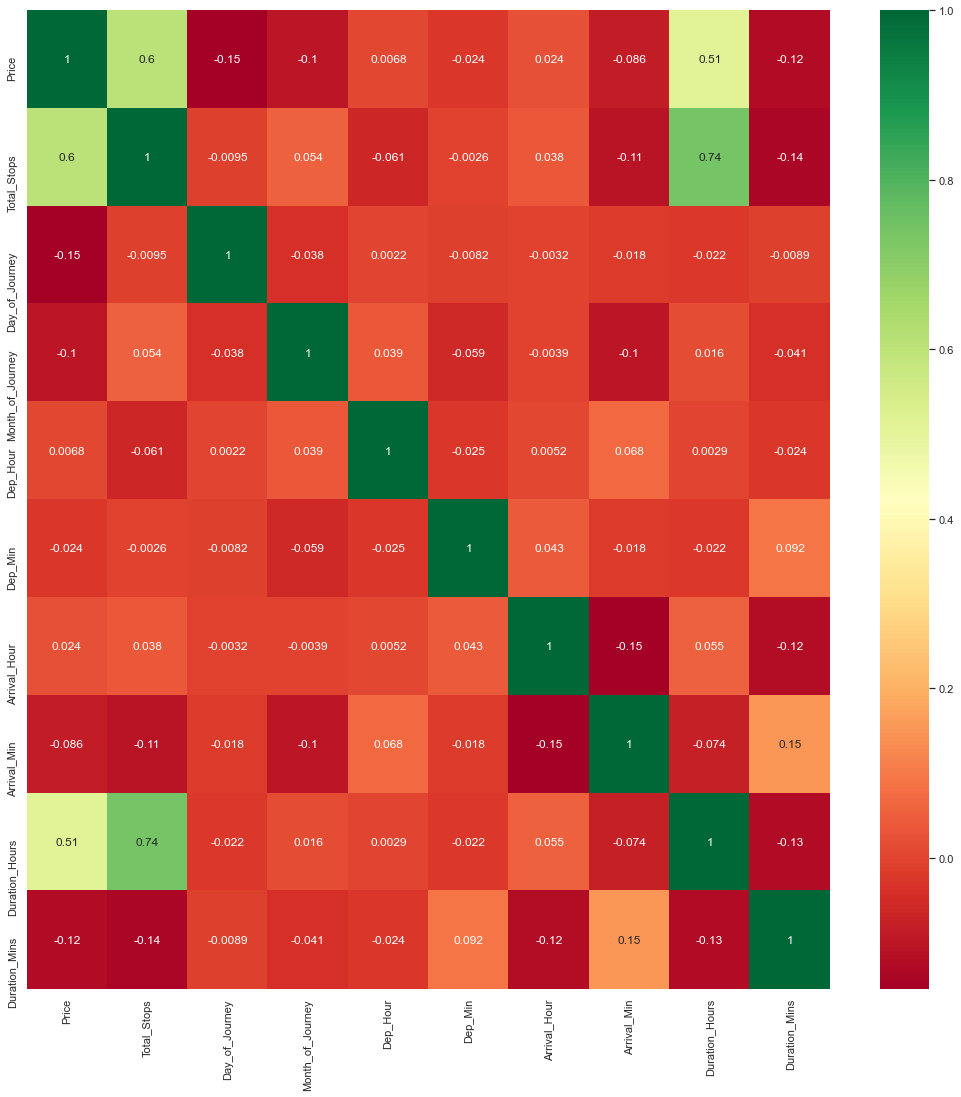

In [72]:
# Heatmap

plt.figure(figsize=(18,18))
sns.heatmap(train_data[cont_var].corr(), annot= True, cmap= "RdYlGn")

plt.show()

In [73]:
## Feature importance using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

selection= ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

In [74]:
print(selection.feature_importances_)

[2.28223201e-01 1.45064001e-01 5.20649058e-02 2.40702602e-02
 2.06037230e-02 2.85515147e-02 1.87455426e-02 1.32505261e-01
 1.77556307e-02 8.93808291e-03 2.09041227e-03 2.02008612e-02
 1.36437845e-01 6.70546607e-02 1.85186648e-02 8.26321889e-04
 3.34575690e-03 9.00424100e-05 4.91026127e-03 8.23292216e-05
 5.33299861e-04 6.83016948e-03 3.30924359e-03 6.62775895e-03
 8.85534050e-03 1.30527316e-02 5.26698826e-03 5.13358530e-04
 2.49318303e-02]


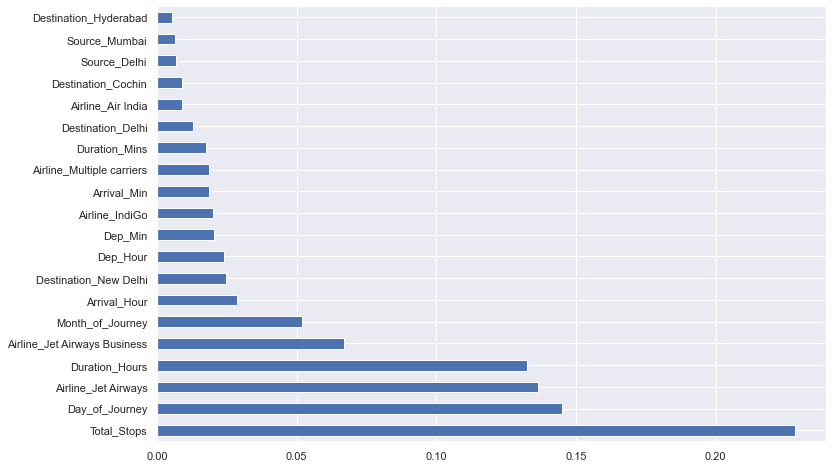

In [75]:
# Plotting feaute importances_ for better visualisations

plt.figure(figsize= (12,8))
feat_importances= pd.Series(selection.feature_importances_, index= X.columns)
feat_importances.nlargest(20).plot(kind= 'barh')
plt.show()

## Fitting Model - RandomForest

1. Split the dataset into train and test
2. Scaling of the data- if needed (Scaling is NOT Done in RandomForest)
3. Import the model
4. Fit the model to data
5. Predict w.r.t. X_test
6. Error Metric- in Regression-->> RMSE score
7. Plot graphs

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.2,random_state= 42 )

In [77]:
from sklearn.ensemble import RandomForestRegressor

RF_regressor= RandomForestRegressor()
RF_regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [78]:
Y_pred= RF_regressor.predict(X_test)

In [79]:
RF_regressor.score(X_train,Y_train)

0.953234599772727

In [80]:
RF_regressor.score(X_test, Y_test)

0.7963975923579978

C:\Users\vikas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


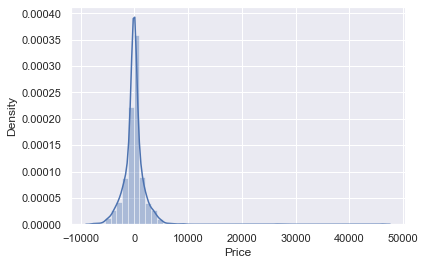

In [81]:
sns.distplot(Y_test - Y_pred)
plt.show()

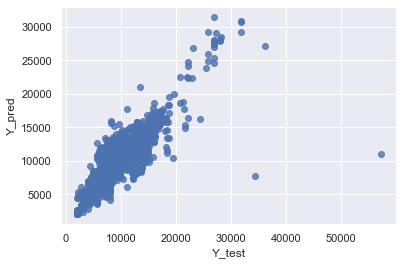

In [82]:
plt.scatter(Y_test, Y_pred, alpha= 0.8)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [83]:
## Other error metrics

from sklearn import metrics

print('MAE: ', metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE: ', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

MAE:  1176.8065766804687
MSE:  4390086.5813118005
RMSE:  2095.253345376592


In [84]:
metrics.r2_score(Y_test, Y_pred)

0.7963975923579978

### Hyperparameter Tuning

* Two methods are used-
1. **RandomizedSearchCV** ---> *Fast*
2. **GridSearchCV**

* Assigning the Hyperparameters ins the form of a dictionary
* Fit the model
* Check for best parameter and best score

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
## RandomizedaserachCV

# Number of Trees in RF
n_estimators= [int(x) for x in np.linspace(start= 100, stop= 1200, num= 12)]

# Number of features to consider at every split
max_features= ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth= [int(x) for x in np.linspace(start= 5, stop= 30, num=6)]

# Minimum number of samples required to split a node
min_samples_split= [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf= [1, 2, 5, 10]


In [87]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [88]:
# RandomizedSeachCV using 5 fold cross validation
# Searching across 100 different combinations

RF_random= RandomizedSearchCV(estimator= RF_regressor, param_distributions= random_grid, scoring ='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [89]:
RF_random.fit(X_train, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
RF_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [91]:
predictions= RF_random.predict(X_test)

C:\Users\vikas\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


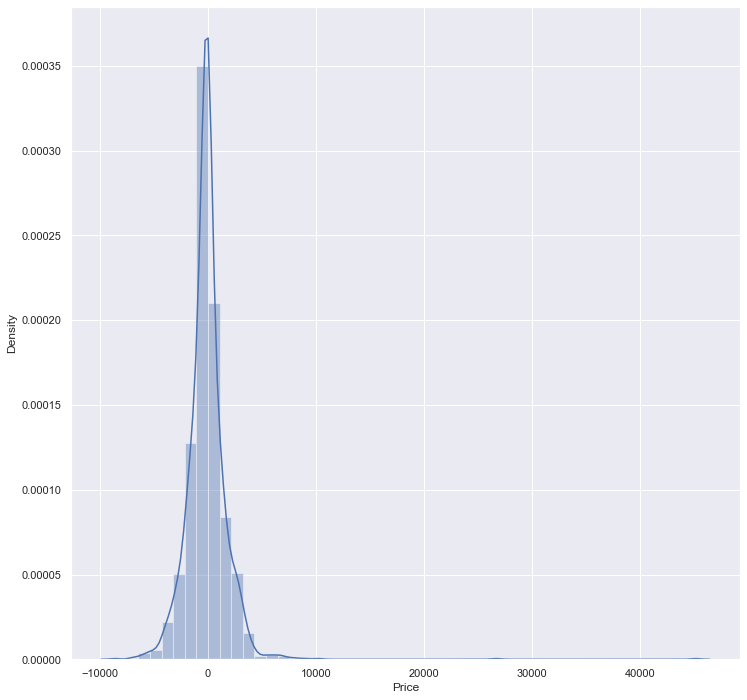

In [92]:
plt.figure(figsize=(12,12))
sns.distplot(Y_test - predictions)
plt.show()

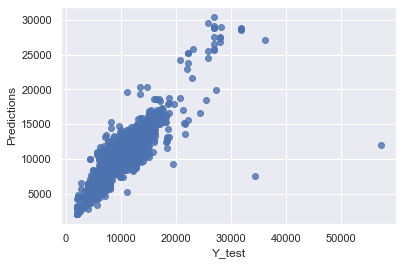

In [93]:
plt.scatter(Y_test, predictions, alpha= 0.8)
plt.xlabel('Y_test')
plt.ylabel('Predictions')
plt.show()

In [94]:
print('MAE: ', metrics.mean_absolute_error(Y_test, predictions))
print('MSE: ', metrics.mean_squared_error(Y_test, predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE:  1165.8334203728728
MSE:  4051854.6199101424
RMSE:  2012.92191103136


In [95]:
metrics.r2_score(Y_test, predictions)

0.8120840350755527

# Saving & Reusing the Model

In [101]:
import pickle 

file= open('Flight_Fare_Prediction_RF.pkl', 'wb')


#Dumping our model to the specified file

pickle.dump(RF_random, file)

In [102]:
model= open('Flight_Fare_Prediction_RF.pkl', 'rb')

Forest= pickle.load(model)

In [98]:
Y_predictions= Forest.predict(X_test)

In [103]:
metrics.r2_score(Y_test, Y_predictions)

0.7963975923579978

In [100]:
metrics.mean_squared_error(Y_test, Y_predictions)

4390086.5813118005